<a href="https://colab.research.google.com/github/daonly/2023Autumn/blob/main/%5B%EB%8D%B0%EA%B3%BC%EC%88%98%5D_%EC%8B%A4%EC%8A%B5_2%EC%B0%A8%EC%8B%9C_%EA%B3%BC%EC%A0%9C_%EC%9D%B4%EB%8B%A4%EC%98%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **23학년도 2학기 데이터과학을위한수학과프로그래밍 실습 2차시 과제**

### 일반대학원 심리학과 2022021241 이다온

Created by Daon Lee(daonlyforus@gmail.com) on 10.31.2023

### 1번

Decision tree의 이진 분류 문제에서($k = 1, 2$), $\hat{p}_{m1}$을 훈련 관측치가 클래스 1에 해당할 확률이라고 하자. 분류 오류율을 계산하는 측도로 Gini index, Entrophy가 주어졌다. 공식은 아래와 같다.

$$(\text{Gini index}) = \Sigma_{k=1}^{K} \hat{p}_{mk} (1 - \hat{p}_{mk})$$

$$(\text{Entrophy}) = - \Sigma_{k=1}^{K} \hat{p}_{mk} \log \hat{p}_{mk}$$

각각의 분류 측도를 $\hat{p}_{m1}$에 대한 함수로 나타내어라. x 축은 0과 1 사이의 $\hat{p}_{m1}$을 나타낸다. (힌트: $\hat{p}_{m2} = 1 - \hat{p}_{m1}$)

<ipython-input-4-9d09845197b2>:10: RuntimeWarning: divide by zero encountered in log
  def e(x): return -x*np.log(x) -np.log(1-x) +x*np.log(1-x)
<ipython-input-4-9d09845197b2>:10: RuntimeWarning: invalid value encountered in multiply
  def e(x): return -x*np.log(x) -np.log(1-x) +x*np.log(1-x)
<ipython-input-4-9d09845197b2>:10: RuntimeWarning: invalid value encountered in add
  def e(x): return -x*np.log(x) -np.log(1-x) +x*np.log(1-x)


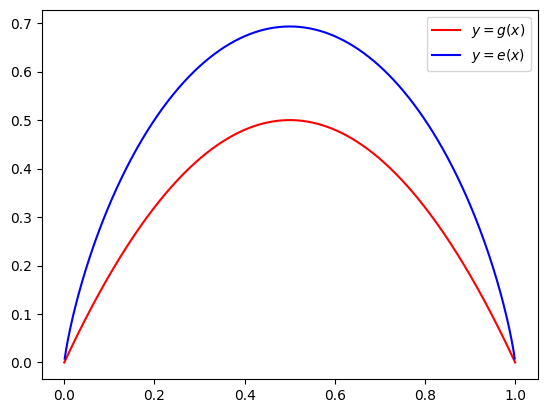

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### 함수들 구하기

# put p hat m1 = x
# put g(x) as a function for Gini index and e(x) for Entrophy

def g(x): return -2*x**2 + 2*x
def e(x): return -x*np.log(x) -np.log(1-x) +x*np.log(1-x)

x = np.linspace(0, 1, 1001)


### 그래프 그리기
line, =plt.plot(x, g(x), 'r')
line2, =plt.plot(x, e(x), 'b')
plt.legend(handles = (line, line2),
           labels = (r'$y = g(x)$', r'$y = e(x)$'))

### 2번

하나의 일변수 함수 $f(x)$와 하나의 값을 입력받고, 해당 점에서의 연속 여부를 판단하는 프로그램을 설계하라. 아래 예시 실행 결과를 실제로 출력하여 프로그램의 작동 여부를 테스트해보시오.

1. 해당 점에서 연속인 경우

        Enter a function in one variable: 1/x
        Enter the variable: x
        Enter the point to check the continuity at: 1
        1/x is continuous at 1

2. 해당 점에서 연속이 아닌 경우

        Enter a function in one variable: 1/x
        Enter the variable: x
        Enter the point to check the continuity at: 0
        1/x is not continuous at 0

In [ ]:
from sympy import Symbol, Limit, sympify

fx = sympify(input('Enter a function in one variable: '))
x = Symbol(input('Enter the variable: '))
point = float(input('Enter the point to check the continuity at: '))

value = fx.subs(x, point)
leftlim = Limit(fx, x, point, dir='-')
rightlim = Limit(fx, x, point, dir='+')

if value == leftlim == rightlim:
  print(f"{fx} is continuous at {point}")
else:
  print(f"{fx} is not continuous at {point}")

Enter a function in one variable: 1/x
Enter the variable: x
Enter the point to check the continuity at: 0
1/x is not continuous at 0.0


### 3번

자동차의 속력이 이동한 거리 S에 따라 균일하게 증가한다고 하자. 이때, $S(t) = 5t^2 + 2t + 8$ 이다. 특정한 시간 $t_1$ 에서의 순간 변화율은 어떻게 되는가? (힌트: $t_1$에서의 순간변화율은 $\underset{\rm \delta_t \to 0}{\rm lim} \frac{S(t_1 + \delta_t) - S(t_1)}{\delta_t}$)

[1] sympy Limit를 이용하여 구하라. (힌트: `t1`과 `delta_t`를 각각 `Symbol`로 지정)

In [ ]:
t1 = Symbol('t1')
delta_t = Symbol('delta_t')
S_t = 5*t1**2 + 2*t1 + 8

Limit((S_t.subs(t1, t1 + delta_t) - S_t) / delta_t, delta_t, 0).doit()

10*t1 + 2

[2] sympy Derivative를 이용하여 구하고, [1]의 결과와 비교하라.

In [ ]:
from sympy import Derivative

t1 = Symbol('t1')
S_t = 5*t1**2 + 2*t1 + 8

Derivative(S_t, t1).doit()

10*t1 + 2

sympy Limit을 이용하여 구한 1번의 답과 sympy Derivative를 이용하여 구한 2번의 답이 동일함을 알 수 있다.

### 4번

다음 함수의 이계도함수를 구하시오.

$$g(x)=\sin x + e^x$$

In [ ]:
from sympy import sin, exp

x = Symbol('x')
gx = sin(x) + exp(x)

derivative = Derivative(gx, x)

Derivative(derivative, x).doit()

exp(x) - sin(x)

### 5번

뉴턴의 방법을 이용하여 다음의 방정식의 근의 근사값을 구하는 코드를 작성하고, 코드의 결과를 sympy의 `nsolve` 함수의 결과와 비교하시오.

$$cos(x) = x^3$$


In [ ]:
### solve with Newton's method

from sympy import cos

x = Symbol('x')
initial_guess = 0.5
fx = cos(x) - x**3

for _ in range(6):
  derivative = Derivative(fx, x).doit()
  initial_guess = initial_guess - fx.subs(x, initial_guess) / derivative.subs(x, initial_guess)

print(f"Netwon's method result :  {initial_guess}")


### solve with nsolve

from sympy import nsolve

print(f"nsolve result :  {nsolve(fx, x, 0.5)}")

Netwon's method result :  0.865474033101614
nsolve result :  0.865474033101614


두 방법으로 구한 근사값이 동일함을 알 수 있다.